# <span style='background-color: #FFD700'><B>Airfare prediction [ML]
#### 2조: 최민성, 김현솔, 박기열, 오세연

## <span style="background-color: #FFB6C1">1. 환경 준비</span>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as spst
import warnings
import joblib
from sklearn.metrics import *

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

plt.rc('font', family='Malgun Gothic')

In [2]:
# 데이터 읽어오기
path = 'Cleaned_dataset.csv'
data = pd.read_csv(path, encoding='cp949')

|변수 | 설명 |
|--------------------|-----------------------|
| Date_of_journey |여행이 시작되는 날짜 |
| Journey_day |여행한 날짜의 일(day) 부분 |
| Airline |항공사 |
| Flight_code |비행기 코드 |
| Class |여행하는 클래스 | 
| Source |출발지 |
| Departure |출발 시간 |
| Total_stops |여행 중 경유지의 총 수 |
| Arrival |목적지에 도착하는 시간 |
| Destination |도착지 |
| Duration_in_hours |여행 소요 시간을 시간 단위로 나타내는 변수 |
| Days_left |여행 날짜에서 예약 날짜를 뺀 파생 특성 |
| Fare |여행에 대한 요금 |

## <span style="background-color: #FFB6C1">2. 데이터 이해</span>

In [21]:
# 상위 5개 행 확인
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [22]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [23]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Duration_in_hours,452088.0,12.349222,7.431478,0.75,6.5833,11.3333,16.5,43.5833
Days_left,452088.0,25.627902,14.300846,1.00,13.0000,26.0000,38.0,50.0000
Fare,452088.0,22840.100890,20307.963002,1307.00,8762.7500,13407.0000,35587.0,143019.0000


In [24]:
data.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

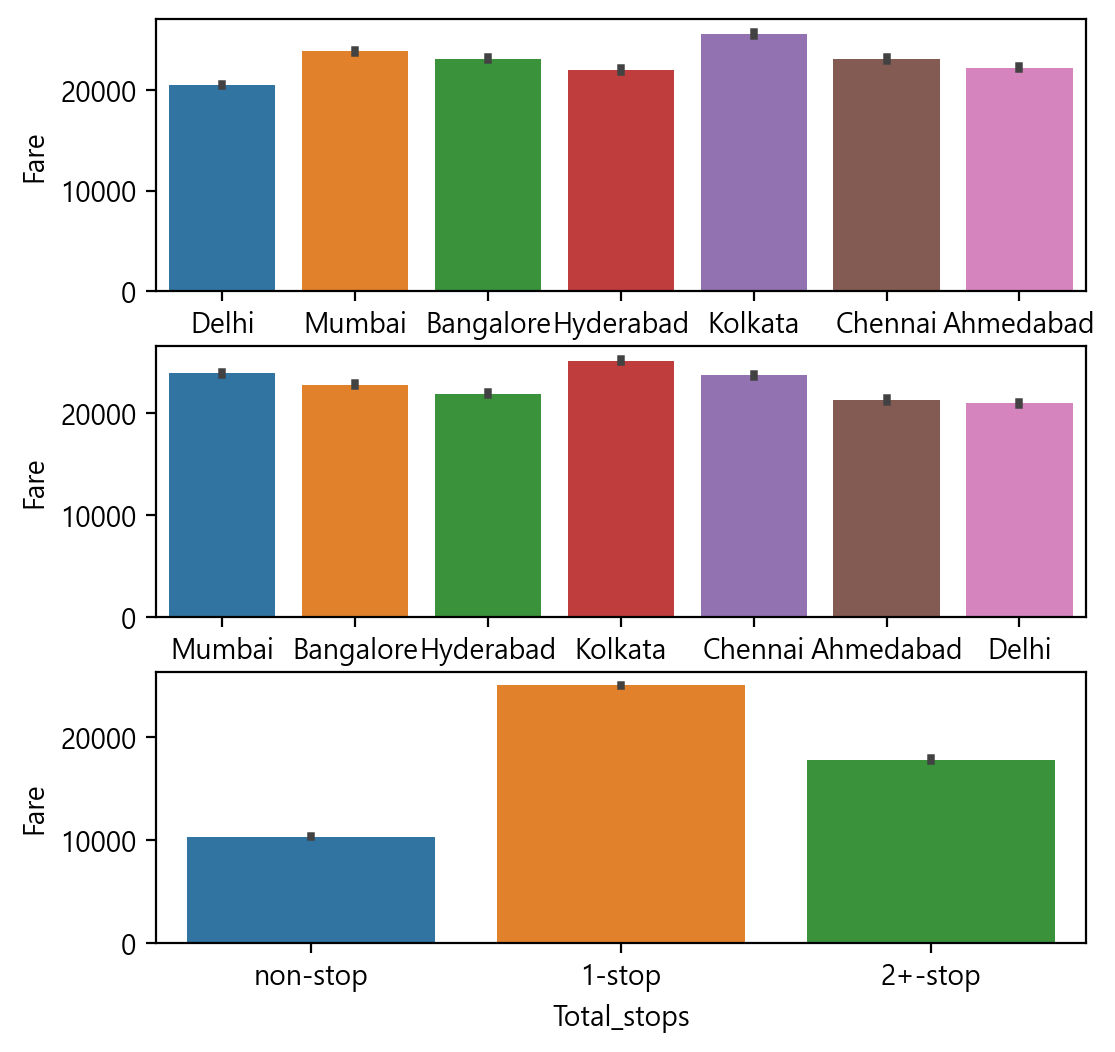

In [25]:
plt.figure(figsize=(6, 6))

plt.subplot(3, 1, 1)
sns.barplot(x='Source', y='Fare', data=data)

plt.subplot(3, 1, 2)
sns.barplot(x='Destination', y='Fare', data=data)

plt.subplot(3, 1, 3)
sns.barplot(x='Total_stops', y='Fare', data=data)

plt.show()

In [26]:
data['Fare'].value_counts()

54879    2702
54608    2521
49613    2128
49713    2089
41549    1842
         ... 
10736       1
9289        1
9056        1
30615       1
25113       1
Name: Fare, Length: 20781, dtype: int64

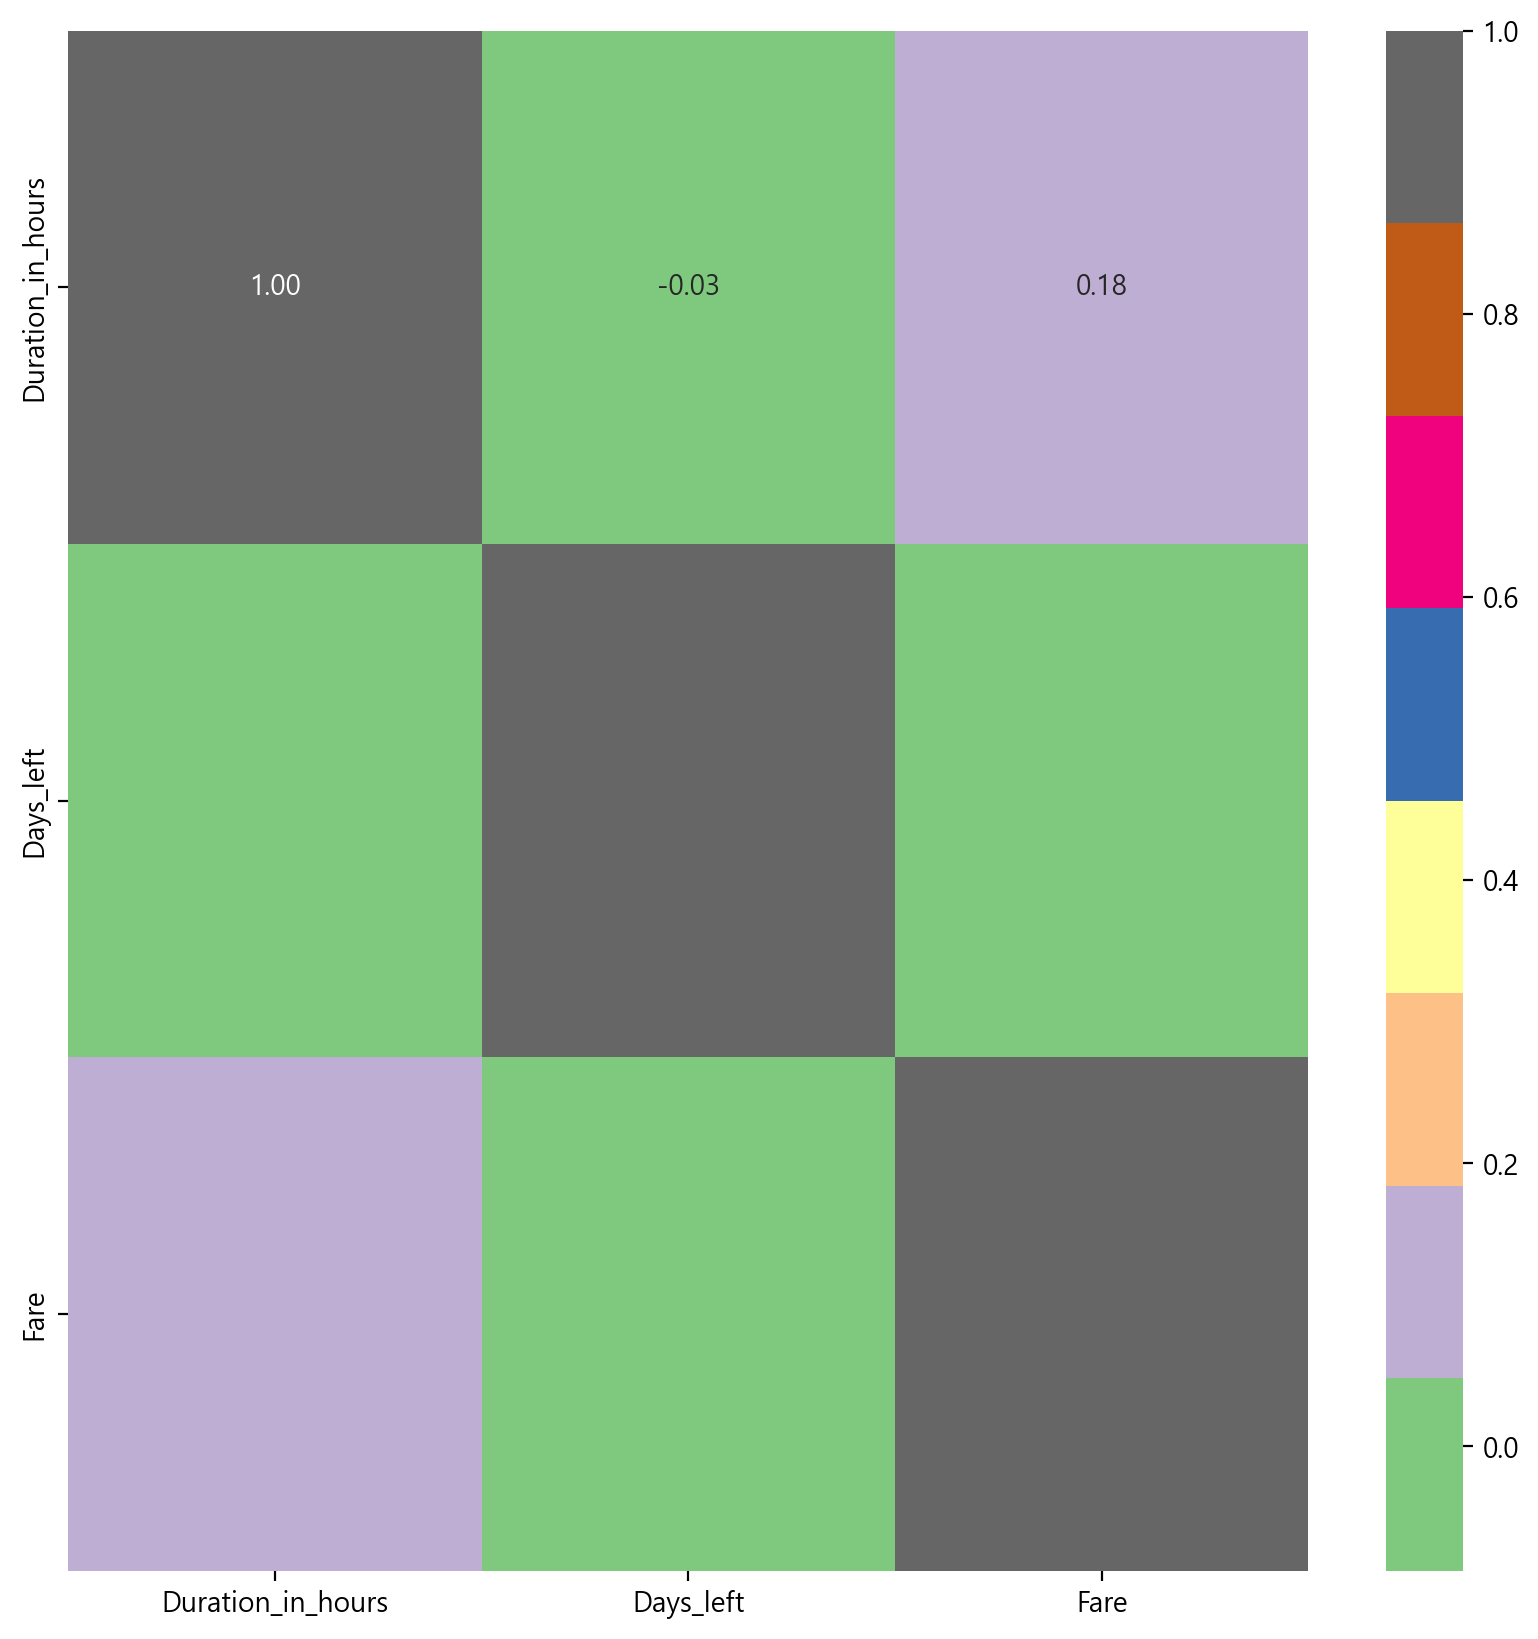

In [27]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Accent')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Airline'] = label_encoder.fit_transform(data['Airline'])
data['Source'] = label_encoder.fit_transform(data['Source'])
data['Departure'] = label_encoder.fit_transform(data['Departure'])
data['Total_stops'] = label_encoder.fit_transform(data['Total_stops'])
data['Destination'] = label_encoder.fit_transform(data['Destination'])

correlation_matrix = data[['Airline', 'Source', 'Departure', 'Total_stops', 'Destination', 'Fare']].corr()

fare_correlation = correlation_matrix['Fare']

print(fare_correlation)

Airline        0.057625
Source         0.028873
Departure     -0.009386
Total_stops   -0.238346
Destination    0.034622
Fare           1.000000
Name: Fare, dtype: float64


### Fare과의 상관관계가 높은 컬럼
- 1. Total_stops
- 2. Duration_in_hours
- 3. Airline_encoded

## <span style="background-color: #FFB6C1">3. 데이터 전처리</span>

In [9]:
data['Date_of_journey'].value_counts()

2023-01-31    9824
2023-02-14    9523
2023-02-15    9510
2023-03-02    9433
2023-01-27    9414
2023-02-09    9381
2023-02-18    9374
2023-02-03    9354
2023-03-01    9342
2023-02-13    9331
2023-01-26    9325
2023-02-05    9321
2023-02-12    9277
2023-02-24    9273
2023-02-08    9264
2023-02-10    9239
2023-02-01    9234
2023-03-06    9222
2023-02-16    9210
2023-01-29    9162
2023-02-20    9162
2023-02-23    9112
2023-01-30    9103
2023-01-25    9066
2023-02-07    9052
2023-02-21    9043
2023-02-27    9042
2023-01-28    9028
2023-02-28    9017
2023-02-04    9012
2023-02-26    9009
2023-02-25    9001
2023-02-06    8980
2023-02-02    8971
2023-03-03    8904
2023-01-23    8898
2023-01-20    8891
2023-02-11    8867
2023-02-17    8857
2023-01-24    8786
2023-01-19    8755
2023-02-22    8708
2023-03-04    8627
2023-01-21    8608
2023-03-05    8584
2023-01-18    8556
2023-01-16    8482
2023-02-19    8461
2023-01-22    8336
2023-01-17    8157
Name: Date_of_journey, dtype: int64

In [48]:
# 변수 제거
del_cols = ['Date_of_journey', 'Flight_code']
data.drop(del_cols, axis=1, inplace=True)

# 확인
data.head()

,Journey_day,Airline,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,Monday,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,Monday,Indigo,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,Monday,GO FIRST,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,Monday,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,Monday,Air India,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [49]:
from sklearn.preprocessing import LabelEncoder

cols = data.select_dtypes('object').columns

# 'Journey_day', 'Airline', 'Class', 'Source', 'Departure',
# 'Total_stops', 'Arrival', 'Destination'

for col in cols:
    le = LabelEncoder()
    le.fit(data[col])
    
    le_encoded = le.transform(data[col])
    print(le_encoded)
    data[col] = le_encoded
    
data

Index(['Journey_day', 'Airline', 'Class', 'Source', 'Departure', 'Total_stops',
       'Arrival', 'Destination'],
      dtype='object')


In [38]:
le.classes_

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata', 'Mumbai'], dtype=object)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Journey_day        452088 non-null  object 
 1   Airline            452088 non-null  int32  
 2   Class              452088 non-null  object 
 3   Source             452088 non-null  int32  
 4   Departure          452088 non-null  int32  
 5   Total_stops        452088 non-null  int32  
 6   Arrival            452088 non-null  object 
 7   Destination        452088 non-null  int32  
 8   Duration_in_hours  452088 non-null  float64
 9   Days_left          452088 non-null  int64  
 10  Fare               452088 non-null  int64  
dtypes: float64(1), int32(5), int64(2), object(3)
memory usage: 29.3+ MB


In [32]:
# 결측치 확인
data.isna().sum()

Journey_day          0
Airline              0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

In [12]:
# target 설정
target = 'Fare'

# 데이터 분리
x = data.drop([target], axis=1)
y = data.loc[:, target]

In [13]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
# 모듈 불러오기
from sklearn.preprocessing import StandardScaler

# 정규화
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## <span style="background-color: #FFB6C1">4. 모델링</span>

**1) Linear Regression**

In [37]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 선언하기
model = LinearRegression()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 결과수집
result = {}
result['Linear Regression'] = r2_score(y_test, y_pred)

**2) KNN**

In [39]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor

# 선언하기
model = KNeighborsRegressor()

# 성능예측
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 결과수집
result['KNN'] = r2_score(y_test, y_pred)

**3) Decision Tree**

In [40]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor

# 선언하기
model = DecisionTreeRegressor(max_depth=10)

# 성능예측
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 결과수집
result['Decision Tree'] = r2_score(y_test, y_pred)

**4) Random Forest**

In [41]:
# 불러오기
from sklearn.ensemble import RandomForestRegressor

# 선언하기
model = RandomForestRegressor(max_depth=10, n_estimators=100)

# 성능예측
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 결과수집
result['Random Forest'] = r2_score(y_test, y_pred)

**5) Gradient Boosting Regressor**

In [42]:
# 불러오기
from sklearn.ensemble import GradientBoostingRegressor

# 선언하기
model = GradientBoostingRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

# 성능예측
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 결과수집
result['Gradient Boosting Regressor'] = r2_score(y_test, y_pred)

**6) XGB**

In [15]:
# 불러오기
from xgboost import XGBRegressor

# 선언하기
model_xgb = XGBRegressor(max_depth=10)

# 성능예측
model_xgb.fit(x_train, y_train)

# 예측하기
y_pred = model_xgb.predict(x_test)

# 결과수집
r2_score(y_test, y_pred)

0.9574725069883242

**7) LGBM**

In [44]:
# 불러오기
from lightgbm import LGBMRegressor

# 선언하기
model = LGBMRegressor(verbose=-100)

# 성능예측
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 결과수집
result['LGBM'] = r2_score(y_test, y_pred)

**8) CatBoostRegressor**

In [45]:
# 불러오기
from catboost import CatBoostRegressor

# 선언하기
model = CatBoostRegressor(learning_rate=0.1,
                          depth=10)

# 성능예측
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 결과수집
result['CB'] = r2_score(y_test, y_pred)

0:	learn: 18548.7409695	total: 172ms	remaining: 2m 52s
1:	learn: 16988.4863081	total: 215ms	remaining: 1m 47s
2:	learn: 15598.6265784	total: 256ms	remaining: 1m 25s
3:	learn: 14372.1753094	total: 301ms	remaining: 1m 15s
4:	learn: 13282.8093099	total: 384ms	remaining: 1m 16s
5:	learn: 12323.9290043	total: 464ms	remaining: 1m 16s
6:	learn: 11517.6760034	total: 492ms	remaining: 1m 9s
7:	learn: 10788.7190128	total: 547ms	remaining: 1m 7s
8:	learn: 10141.6911585	total: 602ms	remaining: 1m 6s
9:	learn: 9578.0243888	total: 648ms	remaining: 1m 4s
10:	learn: 9096.6262805	total: 695ms	remaining: 1m 2s
11:	learn: 8682.0289903	total: 741ms	remaining: 1m 1s
12:	learn: 8329.6055388	total: 784ms	remaining: 59.5s
13:	learn: 8024.2971645	total: 832ms	remaining: 58.6s
14:	learn: 7753.2743503	total: 879ms	remaining: 57.7s
15:	learn: 7530.0070950	total: 924ms	remaining: 56.8s
16:	learn: 7340.2972734	total: 970ms	remaining: 56.1s
17:	learn: 7165.2758000	total: 1.01s	remaining: 55.3s
18:	learn: 7022.4941801

152:	learn: 5285.5155457	total: 7.4s	remaining: 40.9s
153:	learn: 5282.6383686	total: 7.44s	remaining: 40.9s
154:	learn: 5278.9744758	total: 7.49s	remaining: 40.9s
155:	learn: 5276.4459482	total: 7.54s	remaining: 40.8s
156:	learn: 5271.8006913	total: 7.59s	remaining: 40.7s
157:	learn: 5268.2555462	total: 7.63s	remaining: 40.7s
158:	learn: 5262.0798300	total: 7.68s	remaining: 40.6s
159:	learn: 5256.2932929	total: 7.73s	remaining: 40.6s
160:	learn: 5253.3714764	total: 7.78s	remaining: 40.5s
161:	learn: 5248.7347373	total: 7.82s	remaining: 40.5s
162:	learn: 5246.2955967	total: 7.86s	remaining: 40.4s
163:	learn: 5243.4982885	total: 7.91s	remaining: 40.3s
164:	learn: 5240.4914563	total: 7.97s	remaining: 40.3s
165:	learn: 5236.8409354	total: 8.03s	remaining: 40.4s
166:	learn: 5231.6009186	total: 8.09s	remaining: 40.4s
167:	learn: 5228.0904722	total: 8.14s	remaining: 40.3s
168:	learn: 5225.1401055	total: 8.19s	remaining: 40.3s
169:	learn: 5223.5595200	total: 8.24s	remaining: 40.2s
170:	learn:

305:	learn: 4847.2194132	total: 14.6s	remaining: 33.1s
306:	learn: 4846.1193294	total: 14.6s	remaining: 33s
307:	learn: 4844.4472932	total: 14.7s	remaining: 33s
308:	learn: 4841.9005886	total: 14.7s	remaining: 32.9s
309:	learn: 4840.5038604	total: 14.8s	remaining: 32.9s
310:	learn: 4838.9666096	total: 14.8s	remaining: 32.8s
311:	learn: 4836.6437718	total: 14.9s	remaining: 32.8s
312:	learn: 4835.2949310	total: 14.9s	remaining: 32.7s
313:	learn: 4832.8481526	total: 15s	remaining: 32.7s
314:	learn: 4831.4281032	total: 15s	remaining: 32.6s
315:	learn: 4829.1048329	total: 15.1s	remaining: 32.6s
316:	learn: 4826.5077471	total: 15.1s	remaining: 32.5s
317:	learn: 4824.8721963	total: 15.1s	remaining: 32.5s
318:	learn: 4822.8660373	total: 15.2s	remaining: 32.4s
319:	learn: 4821.6990722	total: 15.2s	remaining: 32.4s
320:	learn: 4820.1492748	total: 15.3s	remaining: 32.3s
321:	learn: 4817.4446617	total: 15.3s	remaining: 32.3s
322:	learn: 4815.6963704	total: 15.4s	remaining: 32.2s
323:	learn: 4813.9

460:	learn: 4583.3521074	total: 21.8s	remaining: 25.4s
461:	learn: 4582.6718724	total: 21.8s	remaining: 25.4s
462:	learn: 4580.6922932	total: 21.9s	remaining: 25.3s
463:	learn: 4580.0609772	total: 21.9s	remaining: 25.3s
464:	learn: 4578.2150640	total: 21.9s	remaining: 25.2s
465:	learn: 4575.1799881	total: 22s	remaining: 25.2s
466:	learn: 4573.7552868	total: 22s	remaining: 25.2s
467:	learn: 4572.3286911	total: 22.1s	remaining: 25.1s
468:	learn: 4570.5418583	total: 22.1s	remaining: 25.1s
469:	learn: 4569.9209220	total: 22.2s	remaining: 25s
470:	learn: 4568.9230873	total: 22.2s	remaining: 25s
471:	learn: 4567.7956625	total: 22.3s	remaining: 24.9s
472:	learn: 4566.6778025	total: 22.3s	remaining: 24.9s
473:	learn: 4565.5423573	total: 22.4s	remaining: 24.8s
474:	learn: 4563.0925361	total: 22.4s	remaining: 24.8s
475:	learn: 4561.8140327	total: 22.4s	remaining: 24.7s
476:	learn: 4560.3977527	total: 22.5s	remaining: 24.7s
477:	learn: 4559.2207893	total: 22.5s	remaining: 24.6s
478:	learn: 4557.6

614:	learn: 4389.3028295	total: 29.1s	remaining: 18.2s
615:	learn: 4387.6464374	total: 29.2s	remaining: 18.2s
616:	learn: 4386.3015151	total: 29.2s	remaining: 18.1s
617:	learn: 4385.6333345	total: 29.3s	remaining: 18.1s
618:	learn: 4384.6691159	total: 29.3s	remaining: 18s
619:	learn: 4383.5134136	total: 29.4s	remaining: 18s
620:	learn: 4382.4189603	total: 29.4s	remaining: 18s
621:	learn: 4381.3844108	total: 29.5s	remaining: 17.9s
622:	learn: 4380.1054382	total: 29.5s	remaining: 17.9s
623:	learn: 4379.0243574	total: 29.6s	remaining: 17.8s
624:	learn: 4377.9636955	total: 29.6s	remaining: 17.8s
625:	learn: 4377.0983372	total: 29.6s	remaining: 17.7s
626:	learn: 4375.5143717	total: 29.7s	remaining: 17.7s
627:	learn: 4374.7678471	total: 29.7s	remaining: 17.6s
628:	learn: 4373.3969319	total: 29.8s	remaining: 17.6s
629:	learn: 4372.8551634	total: 29.8s	remaining: 17.5s
630:	learn: 4371.6522874	total: 29.9s	remaining: 17.5s
631:	learn: 4369.7996504	total: 29.9s	remaining: 17.4s
632:	learn: 4368

765:	learn: 4240.7251278	total: 36.6s	remaining: 11.2s
766:	learn: 4239.9177259	total: 36.6s	remaining: 11.1s
767:	learn: 4238.9739832	total: 36.7s	remaining: 11.1s
768:	learn: 4237.8383958	total: 36.8s	remaining: 11s
769:	learn: 4236.5297191	total: 36.8s	remaining: 11s
770:	learn: 4235.4919081	total: 36.9s	remaining: 10.9s
771:	learn: 4235.0351335	total: 36.9s	remaining: 10.9s
772:	learn: 4233.9856784	total: 37s	remaining: 10.9s
773:	learn: 4233.4544571	total: 37s	remaining: 10.8s
774:	learn: 4232.2036856	total: 37.1s	remaining: 10.8s
775:	learn: 4231.1472983	total: 37.2s	remaining: 10.7s
776:	learn: 4230.3933432	total: 37.2s	remaining: 10.7s
777:	learn: 4229.5981482	total: 37.3s	remaining: 10.6s
778:	learn: 4228.4200708	total: 37.4s	remaining: 10.6s
779:	learn: 4226.2010507	total: 37.4s	remaining: 10.6s
780:	learn: 4225.6314027	total: 37.5s	remaining: 10.5s
781:	learn: 4224.7451952	total: 37.5s	remaining: 10.5s
782:	learn: 4223.5844381	total: 37.6s	remaining: 10.4s
783:	learn: 4222.5

917:	learn: 4107.4132725	total: 44.3s	remaining: 3.96s
918:	learn: 4106.4707771	total: 44.4s	remaining: 3.91s
919:	learn: 4105.4485750	total: 44.4s	remaining: 3.86s
920:	learn: 4104.5152331	total: 44.5s	remaining: 3.81s
921:	learn: 4103.8036963	total: 44.5s	remaining: 3.77s
922:	learn: 4102.8901491	total: 44.6s	remaining: 3.72s
923:	learn: 4102.1813881	total: 44.6s	remaining: 3.67s
924:	learn: 4101.5614888	total: 44.7s	remaining: 3.62s
925:	learn: 4100.6649753	total: 44.7s	remaining: 3.57s
926:	learn: 4099.5164380	total: 44.8s	remaining: 3.53s
927:	learn: 4098.5777112	total: 44.8s	remaining: 3.48s
928:	learn: 4098.0498477	total: 44.9s	remaining: 3.43s
929:	learn: 4097.5958108	total: 44.9s	remaining: 3.38s
930:	learn: 4096.5829639	total: 45s	remaining: 3.33s
931:	learn: 4095.8335041	total: 45s	remaining: 3.29s
932:	learn: 4095.3192794	total: 45.1s	remaining: 3.24s
933:	learn: 4094.5547457	total: 45.1s	remaining: 3.19s
934:	learn: 4093.9193665	total: 45.2s	remaining: 3.14s
935:	learn: 40

## <span style="background-color: #FFB6C1">5. 성능 비교</span>

In [46]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

Linear Regression 0.84
KNN 0.921
Decision Tree 0.909
Random Forest 0.914
Gradient Boosting Regressor 0.947
XGB 0.957
LGBM 0.922
CB 0.954


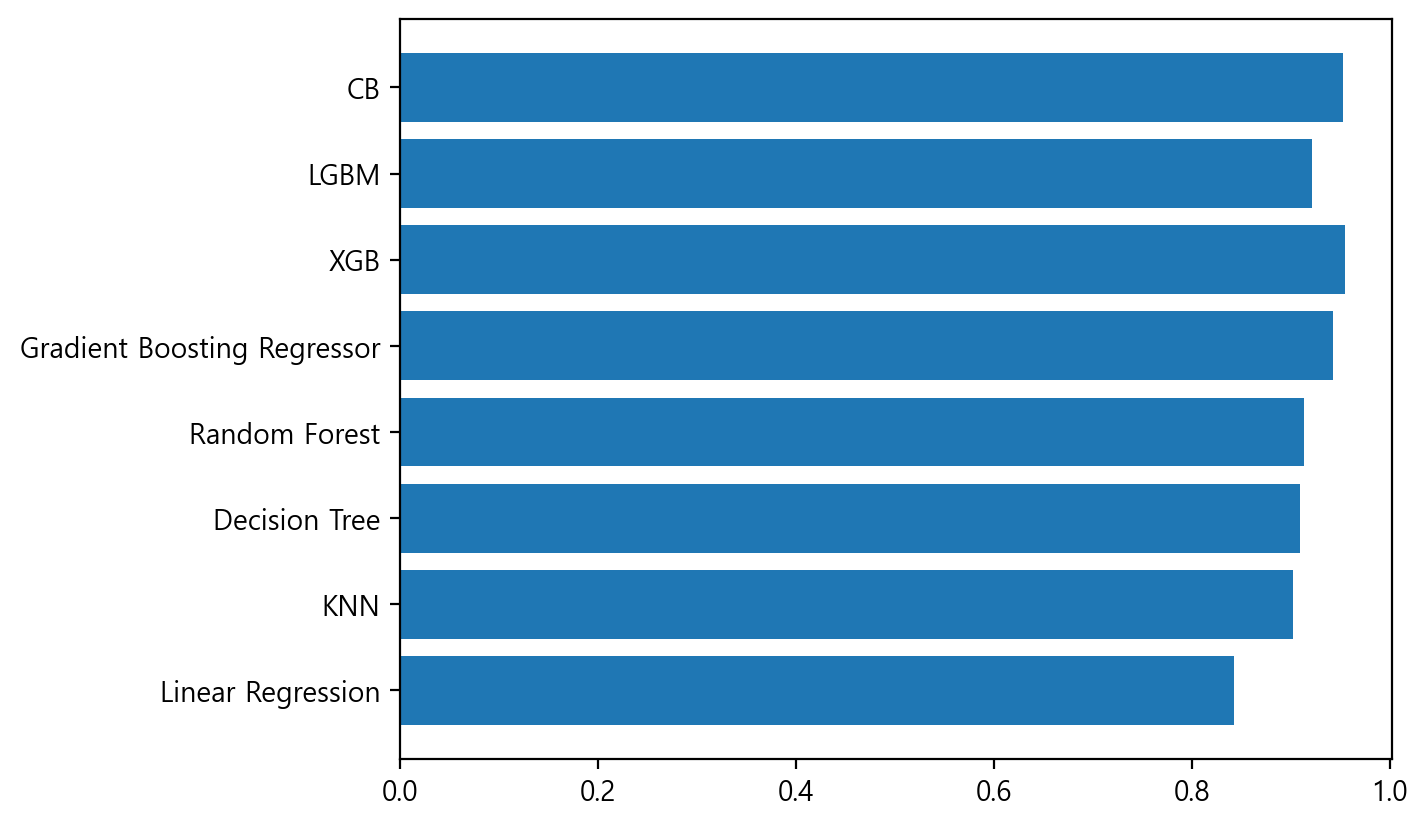

In [27]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

**r2_score**: LGBM > CB > XGB > GB > KNN > DT = RF > LR (max_depth = 4)

## <span style="background-color: #FFB6C1">6. 성능 튜닝</span>

{'max_depth': 10}
0.9209533642164469


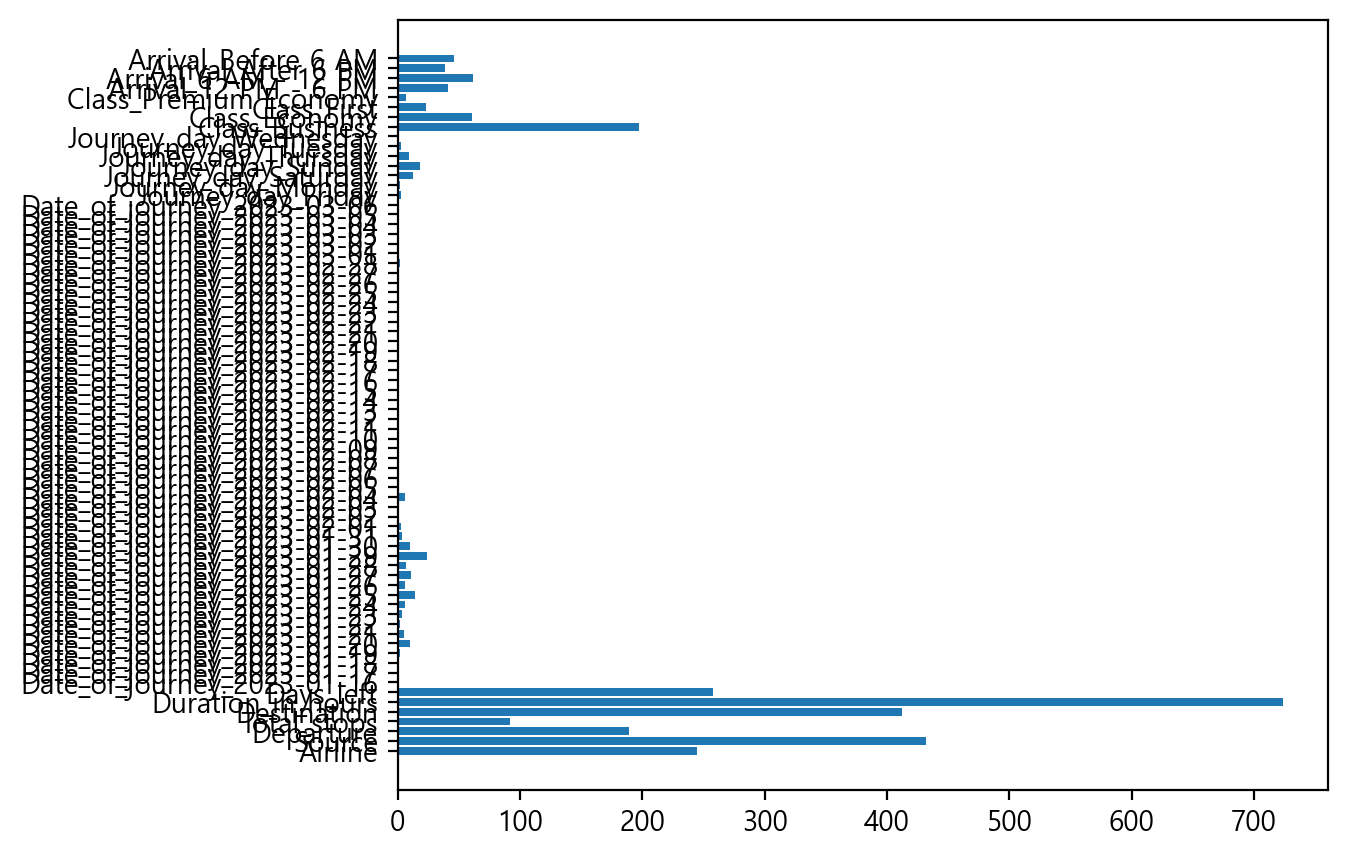

In [28]:
from sklearn.model_selection import GridSearchCV

# 파라미터 지정
param = {'max_depth' : range(1, 11)}

# 모델 선언
model = LGBMRegressor(verbose=-100)
model = GridSearchCV(model, param, cv=5)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 최적 파라미터, 예측 최고 성능
print(model.best_params_)
print(model.best_score_)

# 변수 중요도 시각화
plt.figure(figsize=(6, 5))
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()

In [16]:
# 최고 성능 XGB모델 pkl로 저장
import joblib

joblib.dump(model, 'fare_model_xgb.pkl')

['fare_model_xgb.pkl']

In [30]:
x[2148:2156]

,Journey_day,Airline,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left
2148,2,8,0,3,3,0,1,6,5.8333,6
2149,2,8,0,3,0,0,2,6,7.7500,6
2150,2,0,2,3,2,2,2,6,2.1667,6
2151,3,4,1,3,3,0,1,6,5.2500,7
2152,3,5,1,3,3,2,1,6,2.5000,7
2153,3,5,1,3,2,0,3,6,9.5000,7
2154,3,4,1,3,3,2,3,6,2.1667,7
2155,3,4,1,3,2,2,3,6,2.1667,7


In [51]:
x_train.shape, x_test.shape

((316461, 11), (135627, 11))

In [70]:
Journey_day = 'Friday'
Airline = 'AkasaAir'
Class = 'Business'
Source = 'Before 6 AM'
Departure ='Delhi'
Total_stops = '1-stop'
Arrival = '6 AM - 12 PM'
Destination = 'Mumbai'

In [71]:
# 대시보드 함수생성

def preprocessing(df):
    
    journey_day_list = {'Monday' : 1 , 'Tuesday' : 5, 'Wednesday' : 6, 'Thurday' : 4, 'Friday' : 0, 'Saturday' : 2, 'Sunday' : 3}

    airline_list = {'Vistara' : 8, 'Air India' : 0, 'Indigo' : 5, 'AirAsia' : 1, 'Go FIRST' : 4, 'SpiceJet' : 6, 'AkasaAir' : 2, 'AllianceAir' : 3, 'StarAir' : 7}

    class_list = {'Economy' : 1, 'Business' : 0, 'Premium Economy' : 3, 'First' : 2}

    source_list = {'Delhi' : 3, 'Mumbai' : 6, 'Bangalore' : 1, 'Hyderabad' : 4, 'Chennai' : 2, 'Ahmedabed' : 0, 'Kolkata' : 5}

    departure_list = {'Before 6 AM' : 3, '6 AM - 12 PM' : 1, '12 PM - 6 PM' : 0, 'After 6 PM' : 2}

    total_stops_list = {'1-stop' : 0, 'non-stop' : 2, '2+-stop' : 1}

    arrival_list = {'Before 6 AM' : 3, '6 AM - 12 PM' : 1, '12 PM - 6 PM' : 0, 'After 6 PM' : 2}

    destination_list = {'Delhi' : 3, 'Mumbai' : 6, 'Bangalore' : 1, 'Hyderabad' : 4, 'Chennai' : 2, 'Ahmedabed' : 0, 'Kolkata' : 5}

    cols = df.select_dtypes('object').columns

    df['Journey_day'] = journey_day_list[Journey_day]

    df['Airline'] = airline_list[Airline]

    df['Class'] = class_list[Class]

    df['Source'] = source_list[Source]

    df['Departure'] = departure_list[Departure]

    df['Total_stops'] = total_stops_list[Total_stops]

    df['Arrival'] = arrival_list[Arrival]

    df['Destination'] = destination_list[Destination]
    
    return df


def fare_predict(fare_data):
    
    test_df = pd.DataFrame(fare_data) # df 생성
    
    test_df = preprocessing(test_df)
    
    model_XGC = joblib.load('fare_model_xgb.pkl')  # model load
    
    pred_y_XGC = model_XGC.predict(test_df)  # predict
    
    return pred_y_XGC[0]

fare_data = {
                'Journey_day' : [Journey_day],
                'Airline' : [Airline],
                'Class' : [Class],
                'Source' : [Source],
                'Departure' : [Departure],
                'Total_stops' : [Total_stops],
                'Arrival' : [Arrival],
                'Destination' : [Destination],
                'Duration_in_hours' : [12],
                'Days_left' : [25]
            }
        
fare_predict(fare_data)

11207.508

In [101]:
# 대시보드 부

# 데이터 읽어오기
path = 'Cleaned_dataset.csv'
data = pd.read_csv(path, encoding='cp949')

In [88]:
data['Airline'].value_counts().index

Index(['Vistara', 'Air India', 'Indigo', 'AirAsia', 'GO FIRST', 'SpiceJet',
       'AkasaAir', 'AllianceAir', 'StarAir'],
      dtype='object')

In [90]:
# df = pd.DataFrame(index = range(9), data = [data['Airline'].value_counts().index, data['Airline'].value_counts().values], columns = ['Airline', 'cnt']) 
                  
df = pd.DataFrame({"Airline": data['Airline'].value_counts().index, "cnt" : data['Airline'].value_counts().values})
    
df

,Airline,cnt
0,Vistara,231490
1,Air India,119841
2,Indigo,65659
3,AirAsia,15764
4,GO FIRST,10786
5,SpiceJet,5863
6,AkasaAir,2230
7,AllianceAir,393
8,StarAir,62


In [97]:
data.groupby(by = 'Airline', as_index = False)['Fare'].mean().sort_values(by = 'Fare', ascending = False)

,Airline,Fare
8,Vistara,27240.788820
0,Air India,26914.593662
7,StarAir,9792.774194
5,Indigo,8198.754809
6,SpiceJet,8109.773154
4,GO FIRST,8015.075005
1,AirAsia,7092.265922
3,AllianceAir,4077.501272
2,AkasaAir,3570.034529


In [103]:
df_1 = data.groupby(by = 'Class', as_index = False)['Fare'].mean()
df_1['Fare'] = round(df_1['Fare'],1) 
df_1

,Class,Fare
0,Business,51669.6
1,Economy,10206.9
2,First,60731.1
3,Premium Economy,16298.8
